In [1]:
import glob
import numpy as np
import pandas as pd 
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import PIL.ImageOps as ImOps

Preproccesing

In [2]:
def persiapan_dataset(path):
    x_latih=[]
    y_latih=[]
    kode = 0
    for labels in os.listdir(path):
        if labels == 'ka':
            kode = 0
        elif labels == 'ca':
            kode = 1
        elif labels == 'ta':
            kode = 2
        elif labels == 'pa':
            kode = 3
        elif labels == 'ya':
            kode = 4
        elif labels == 'wa':
            kode = 5
        elif labels == 'ga':
            kode = 6
        elif labels == 'ja':
            kode = 7
        elif labels == 'da':
            kode = 8
        elif labels == 'ba':
            kode = 9
        elif labels == 'ra':
            kode = 10
        elif labels == 'sa':
            kode = 11
        elif labels == 'nga':
            kode = 12
        elif labels == 'nya':
            kode = 13
        elif labels == 'na':
            kode = 14
        elif labels == 'ma':
            kode = 15
        elif labels == 'la':
            kode = 16
        elif labels== 'ha':
            kode = 17
            
        semua_images_path = glob.glob(path+labels+'/*.jpg')
        for img_path in semua_images_path :
                img=load_img(img_path, target_size=(64,64))
                img=img_to_array(img)
                img=img/255.0
                x_latih.append(img)
                y_latih.append(kode)
    return np.array(x_latih),np.array(y_latih)

In [3]:
x_latih, y_latih = persiapan_dataset('train-set/')
x_val, y_val = persiapan_dataset('test-set/')

In [4]:
print("Shape x_train :",x_latih.shape)
print("Shape y_train:", y_latih.shape)
print(" bShape x_train :",x_val.shape)
print("Shape y_train:", y_val.shape)

Shape x_train : (575, 64, 64, 3)
Shape y_train: (575,)
 bShape x_train : (144, 64, 64, 3)
Shape y_train: (144,)


In [5]:
from keras.preprocessing.image import ImageDataGenerator
import dataaug

datagen = ImageDataGenerator(
        rotation_range=10,
        width_shift_range=0.1,
        height_shift_range=0.1,
        zoom_range=0.3,
        horizontal_flip=False)

datagen.fit(x_latih, augment=True)
data_test = datagen.flow(x_latih, y_latih, batch_size=5)

In [6]:
x_latih, y_latih = persiapan_dataset('train-set/')

Train Augmetasi Data


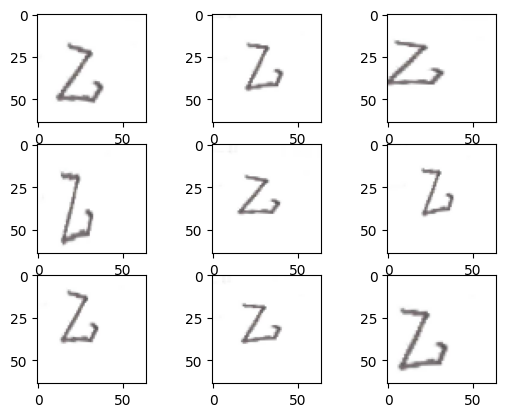

In [7]:
from numpy import expand_dims
import matplotlib.pyplot as plt

img = x_latih[100]
samples = expand_dims(img, 0)
it = datagen.flow(samples, batch_size=1)
print("Train Augmetasi Data")
for i in range(9):
    plt.subplot(330 + 1 + i)
    batch = it.next()
    image = batch[0]
    plt.imshow(image)
plt.show()

In [8]:
import keras 
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPool2D, Flatten
from keras.optimizers import Adam

def modelLeNet():
    model = Sequential()

    model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(64,64,3)))
    model.add(MaxPool2D(2,2))
    model.add(Conv2D(48, (5, 5), activation='relu'))
    model.add(MaxPool2D(2,2))
    model.add(Conv2D(120, (5, 5), activation='relu'))
    
    model.add(Flatten())

    model.add(Dense(256, activation='relu'))
    model.add(Dense(84, activation='relu'))
    model.add(Dense(18, activation = 'softmax'))
    model.compile(optimizer = Adam(lr=0.0001), 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['acc'])
    return model

modelLeNet().summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 60, 60, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 48)        38448     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 48)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 120)         144120    
                                                                 
 flatten (Flatten)           (None, 9720)              0

c:\Users\kiran\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [9]:
LeNet_Aug = modelLeNet()
LeNet_non_Aug = modelLeNet()

In [10]:
history_nonAug = LeNet_non_Aug.fit(x_latih,y_latih,epochs=15,validation_data=(x_val,y_val))

Epoch 1/15
18/18 [==============================] - 5s 217ms/step - loss: 2.9054 - acc: 0.0487 - val_loss: 2.8889 - val_acc: 0.0486
Epoch 2/15
18/18 [==============================] - 3s 179ms/step - loss: 2.8917 - acc: 0.0643 - val_loss: 2.8875 - val_acc: 0.0694
Epoch 3/15
18/18 [==============================] - 4s 215ms/step - loss: 2.8846 - acc: 0.0783 - val_loss: 2.8786 - val_acc: 0.0833
Epoch 4/15
18/18 [==============================] - 4s 210ms/step - loss: 2.8729 - acc: 0.1113 - val_loss: 2.8595 - val_acc: 0.0972
Epoch 5/15
18/18 [==============================] - 3s 170ms/step - loss: 2.8368 - acc: 0.1513 - val_loss: 2.7979 - val_acc: 0.1528
Epoch 6/15
18/18 [==============================] - 3s 162ms/step - loss: 2.7430 - acc: 0.1670 - val_loss: 2.6801 - val_acc: 0.1667
Epoch 7/15
18/18 [==============================] - 3s 163ms/step - loss: 2.6001 - acc: 0.2174 - val_loss: 2.4896 - val_acc: 0.2569
Epoch 8/15
18/18 [==============================] - 3s 175ms/step - loss: 2.

In [12]:
history_Lenet_Aug = LeNet_Aug.fit(data_test,validation_data=(x_val,y_val),
          steps_per_epoch=len(x_latih)/5, epochs=15)

Epoch 1/15
115/115 [==============================] - 8s 69ms/step - loss: 2.8879 - acc: 0.0800 - val_loss: 2.8814 - val_acc: 0.1111
Epoch 2/15
115/115 [==============================] - 9s 81ms/step - loss: 2.8659 - acc: 0.1061 - val_loss: 2.7624 - val_acc: 0.1667
Epoch 3/15
115/115 [==============================] - 7s 64ms/step - loss: 2.7703 - acc: 0.1357 - val_loss: 2.4768 - val_acc: 0.2292
Epoch 4/15
115/115 [==============================] - 7s 61ms/step - loss: 2.6507 - acc: 0.1843 - val_loss: 2.2679 - val_acc: 0.2917
Epoch 5/15
115/115 [==============================] - 9s 77ms/step - loss: 2.5161 - acc: 0.2243 - val_loss: 1.9609 - val_acc: 0.3681
Epoch 6/15
115/115 [==============================] - 9s 81ms/step - loss: 2.3229 - acc: 0.2487 - val_loss: 1.8673 - val_acc: 0.4444
Epoch 7/15
115/115 [==============================] - 9s 81ms/step - loss: 2.2013 - acc: 0.3043 - val_loss: 1.6821 - val_acc: 0.4028
Epoch 8/15
115/115 [==============================] - 10s 86ms/step -

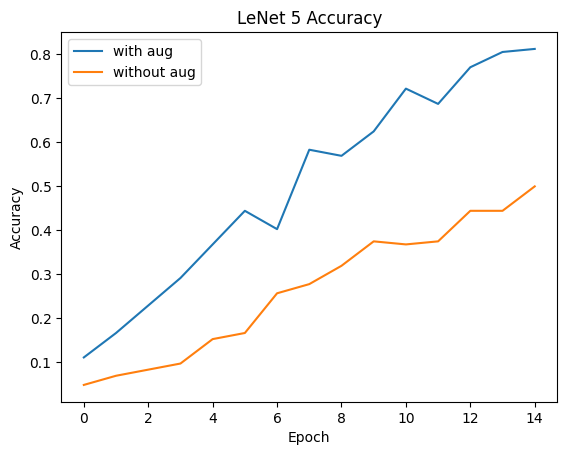

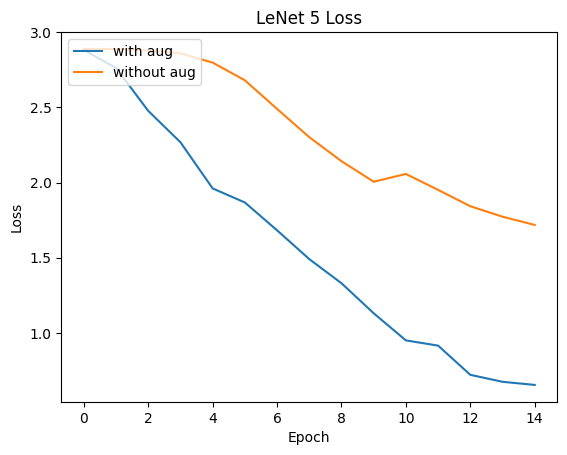

In [13]:
import matplotlib.pyplot as plt
from random import randint
import matplotlib.pyplot as plt
plt.plot(history_Lenet_Aug.history['val_acc'])
plt.plot(history_nonAug.history['val_acc'])
plt.title('LeNet 5 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['with aug', 'without aug'], loc='upper left')
plt.show()

plt.plot(history_Lenet_Aug.history['val_loss'])
plt.plot(history_nonAug.history['val_loss'])
plt.title('LeNet 5 Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['with aug', 'without aug'], loc='upper left')
plt.show()

In [15]:
def prediksi_dataset(path):
    x_predik=[]
    y_predik=[]
    label = 0
    for labels in os.listdir(path):
        if labels == 'ka':
            label = 0
        elif labels == 'ca':
            label = 1
        elif labels == 'ta':
            label = 2
        elif labels == 'pa':
            label = 3
        elif labels == 'ya':
            label = 4
        elif labels == 'wa':
            label = 5
        elif labels == 'ga':
            label = 6
        elif labels == 'ja':
            label = 7
        elif labels == 'da':
            label = 8
        elif labels == 'ba':
            label = 9
        elif labels == 'ra':
            label = 10
        elif labels == 'sa':
            label = 11
        elif labels == 'nga':
            label = 12
        elif labels == 'nya':
            label = 13
        elif labels == 'na':
            label = 14
        elif labels == 'ma':
            label = 15
        elif labels == 'la':
            label = 16
        elif labels== 'ha':
            label = 17
            
        all_images_path=glob.glob(path+labels+'/*.jpg')
        for img_path in all_images_path :
                img=load_img(img_path, target_size=(64,64))
                img = ImOps.invert(img)
                img=img_to_array(img)
                img=img/255.0
                x_predik.append(img)
                y_predik.append(label)
    return np.array(x_predik),np.array(y_predik)

def get_classlabel(class_code):
    labels = {0:'ka', 1:'ca', 2:'ta', 3:'pa', 4:'ya', 5:'wa', 6:'ga', 7:'ja', 8:'da',
              9:'ba', 10:'ra', 11:'sa', 12:'nga', 13:'nya', 14:'na', 15:'ma', 16:'la', 17:'ha'}
    classl = labels[class_code]
    
    return classl

In [16]:
x_predik, y_predik = prediksi_dataset('prediksi/')
print("Shape x_prediksi :",x_predik.shape)
print("Shape y_prediksi:", y_predik.shape)

Shape x_prediksi : (0,)
Shape y_prediksi: (0,)


In [17]:
def pred_dataset(path):
    x_train=[]
    all_images_path=glob.glob(path+'/*.jpg')
    for img_path in all_images_path :
            img=load_img(img_path, target_size=(64,64))
            img=img_to_array(img)
            img=img/255.0
            x_train.append(img)
    return np.array(x_train)

In [18]:
pred_img = pred_dataset('prediksi/')
pred_img.shape

(36, 64, 64, 3)

1/1 [==============================] - 0s 27ms/step


C:\Users\kiran\AppData\Local\Temp\ipykernel_13720\1010702959.py:22: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


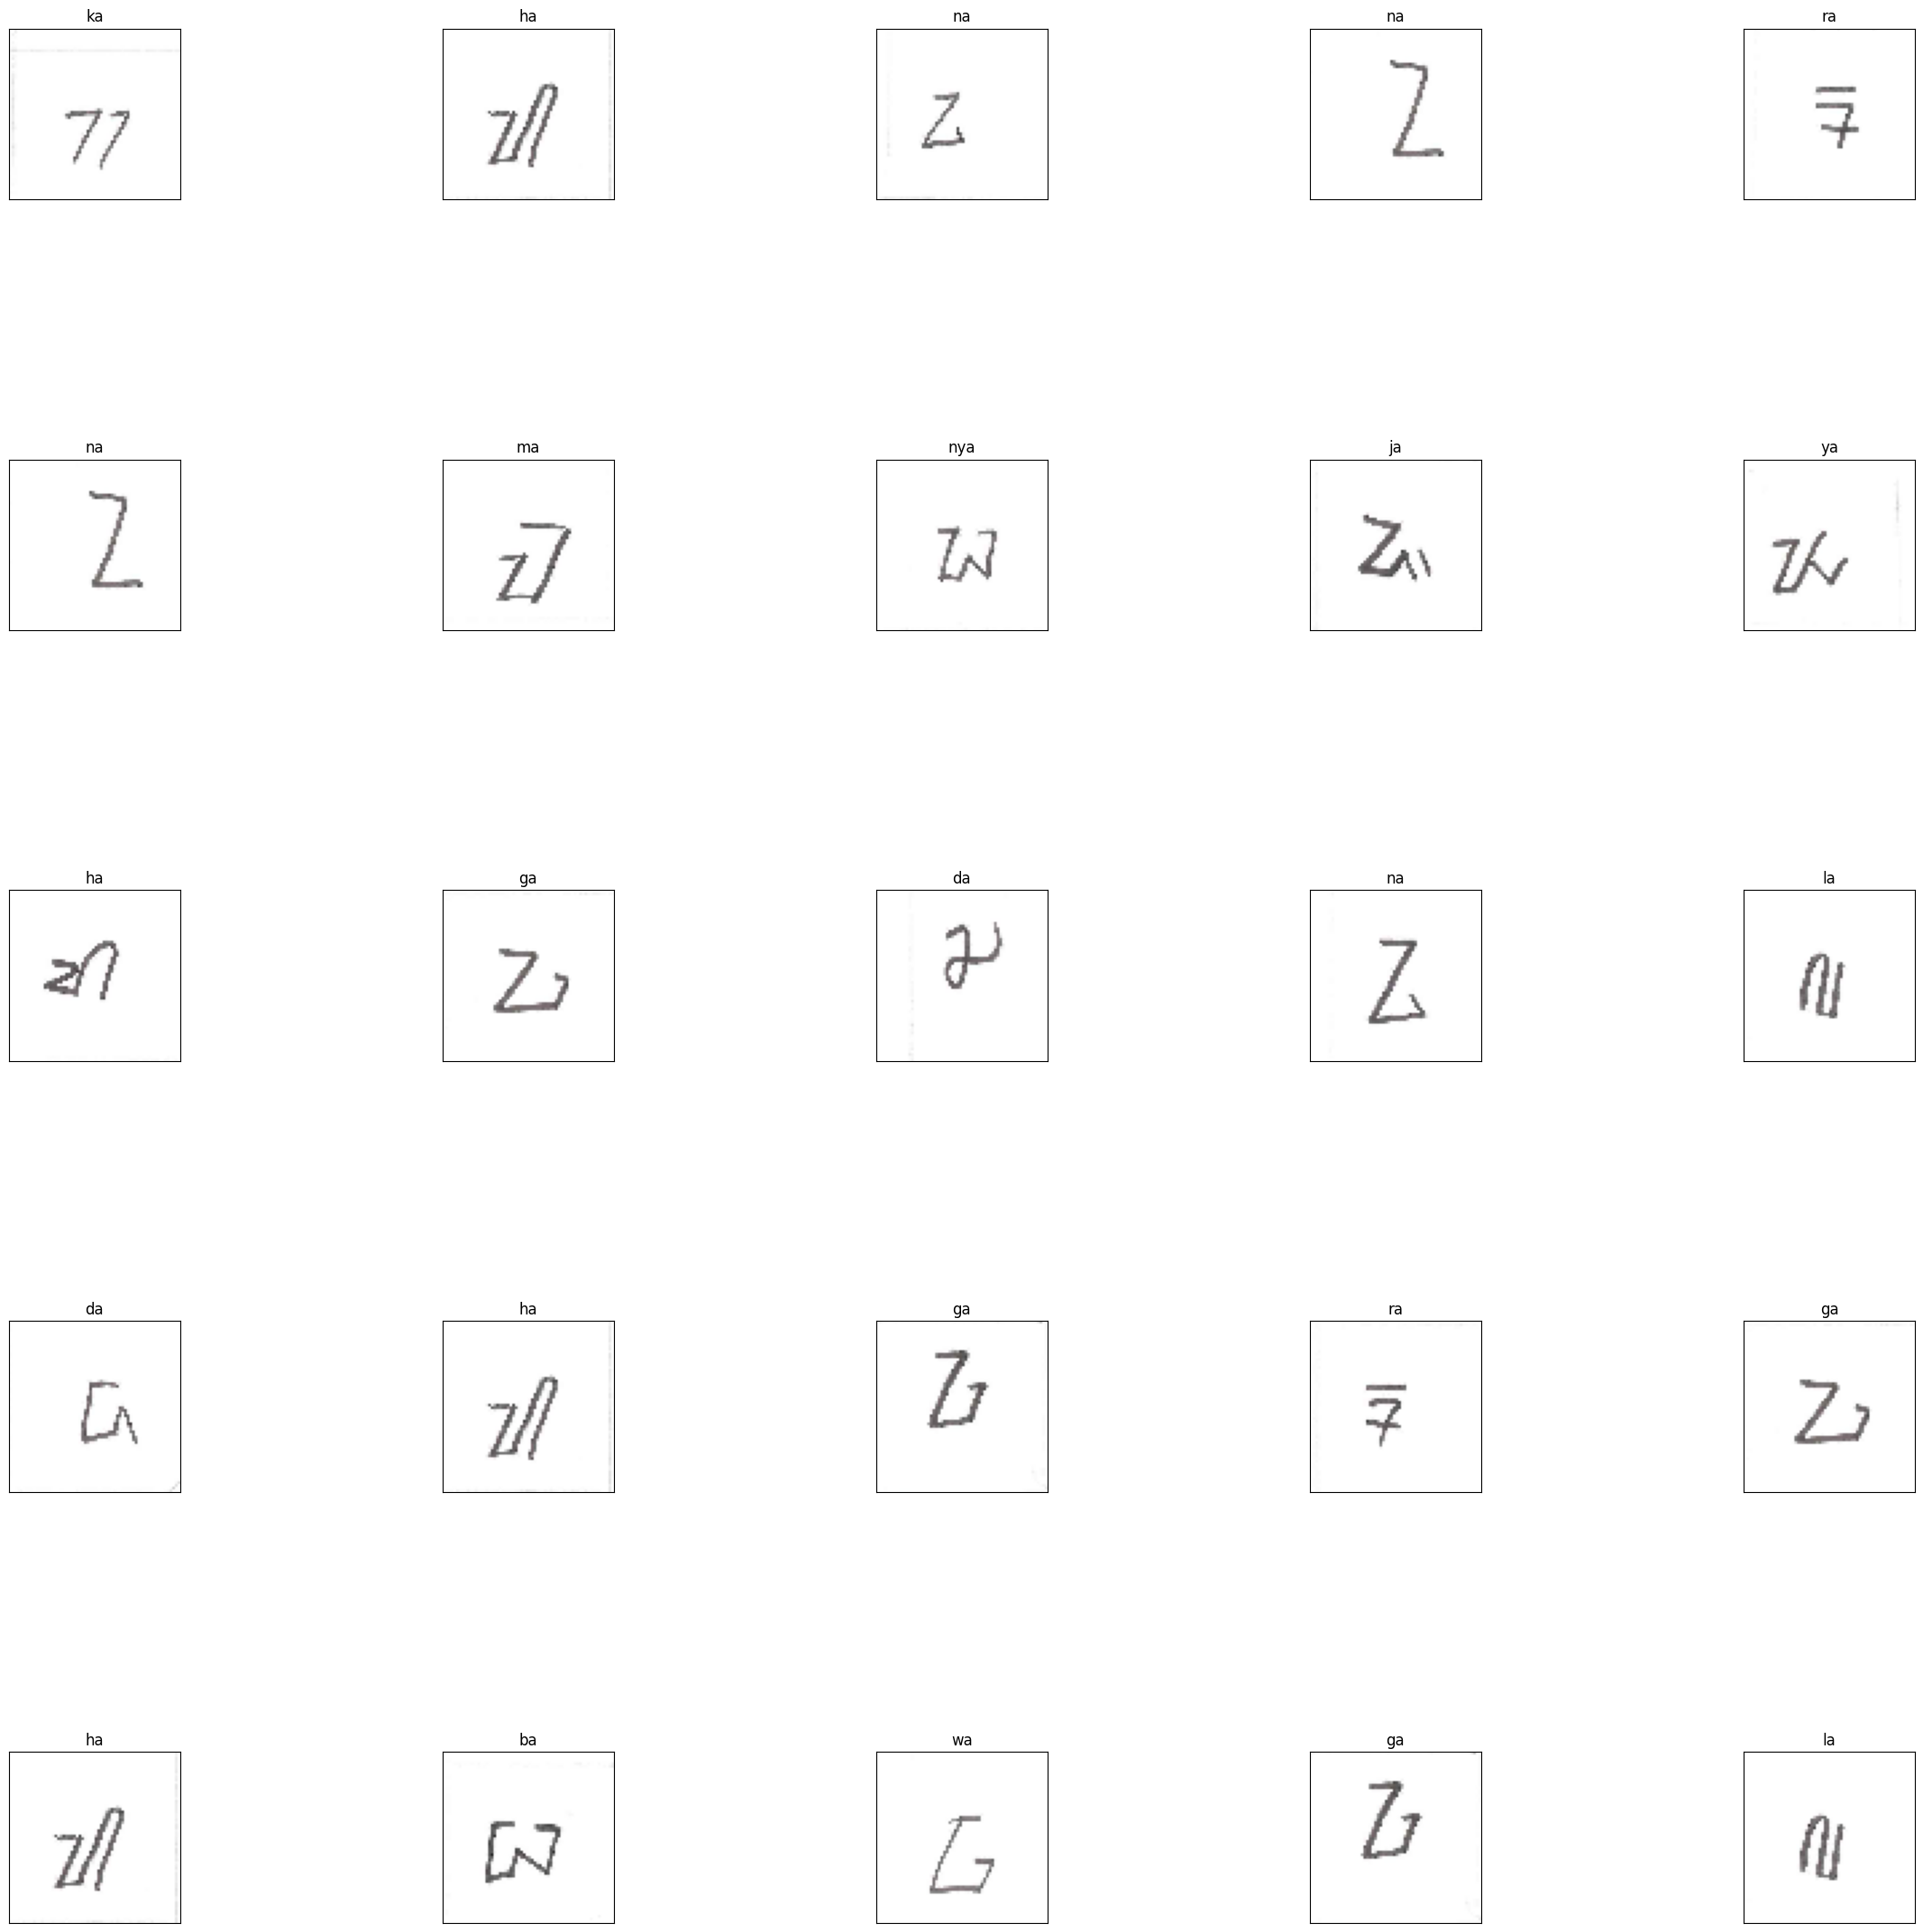

In [19]:
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
from random import randint
fig = plt.figure(figsize=(30, 30))
outer = gridspec.GridSpec(5, 5)

for i in range(25):
    inner = gridspec.GridSpecFromSubplotSpec(2, 1,subplot_spec=outer[i], wspace=0.1, hspace=0.1)
    rnd_number = randint(0,len(pred_img))
    pred_image = np.array([pred_img[rnd_number]])
    x = np.argmax(LeNet_Aug.predict(pred_image)[0])
    for j in range(2):
        if (j%2) == 0:
            ax = plt.Subplot(fig, inner[j])
            ax.imshow((pred_image[0]*255).astype(np.uint8))
            ax.set_title(get_classlabel(x))
            ax.set_xticks([])
            ax.set_yticks([])
            fig.add_subplot(ax)


fig.show()

1/5 [=====>........................] - ETA: 0s

5/5 [==============================] - 0s 40ms/step


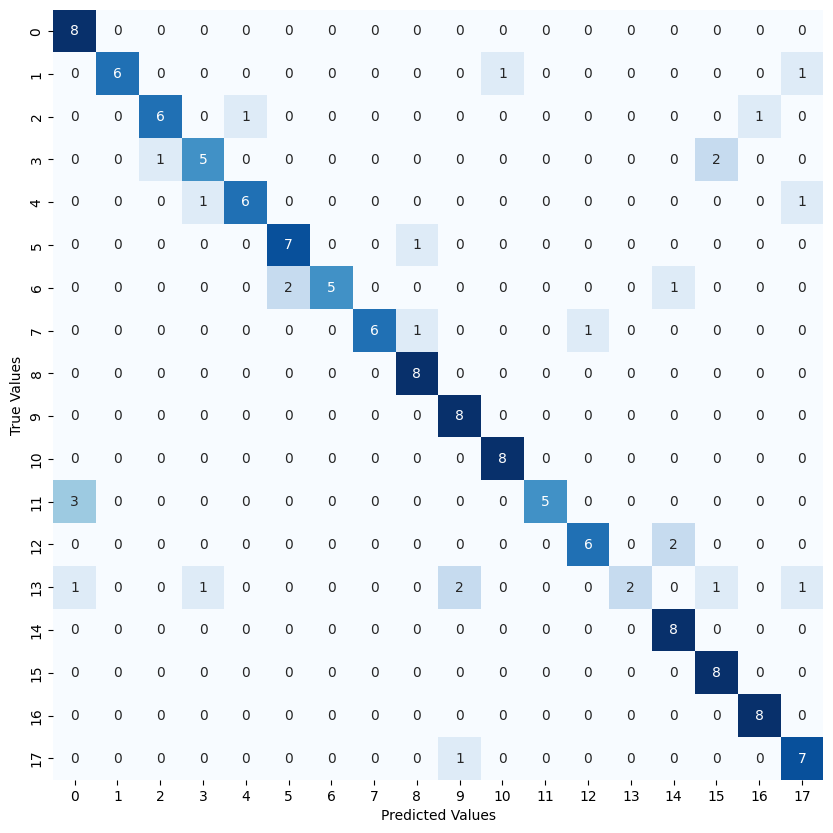

In [23]:
import seaborn as sns
import sklearn
from sklearn.metrics import confusion_matrix

fig = plt.figure(figsize=(10, 10)) # Set Figure

y_pred = LeNet_Aug.predict(x_val)

Y_pred = np.argmax(y_pred, 1) 

mat = confusion_matrix(y_val, Y_pred) # Confusion matrix

# Plot Confusion matrix
sns.heatmap(mat, square=True, annot=True, cbar=False, cmap=plt.cm.Blues)
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.show()

In [29]:
LeNet_Aug.save('model_cnn.h5')

In [30]:
TF_LITE_MODEL_FILE_NAME = "tf_lite_model.tflite"

In [ ]:
# tf_lite_converter = tf.lite.TFLiteConverter.from_keras_model(model_cnn)
# tflite_model = tf_lite_converter.convert()

In [ ]:
# tflite_model_name = TF_LITE_MODEL_FILE_NAME
# open(tflite_model_name, "wb").write(tflite_model)

In [ ]:
# convert_bytes(get_file_size(TF_LITE_MODEL_FILE_NAME), "KB")